# INVESTIGATE THE DATASET: TMDb Movie Data 

Table of Contents
1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions

# INTRODUCTION

#### 1. Analyzing the dataset

In [62]:
#importing the special libraries

import csv
import numpy as np
import pandas as pd

In [63]:
# Looking at the dataset

tmdb_data= pd.read_csv('tmdb-movies.csv')
tmdb_data.head(5)   # to read the top 5 rows only

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In the dataset, the following observations have been made:
    1) The columns: budget, revenue, budget_adj, revenue_adj  in lot of the rows of dataset have value 0. So, this has to be removed while cleaning the data.
    2) The vote count is varied significantly, and thus vote_average isn't very reliable either. It does not make much sense to include the columns which will not give us correct results, because of the variable measures. 
    3) In the release_data, some rows have depicted date as: 4-12-15, whereas the rest have in the format: 4/2/5. This has to be made consistent as well. 
    4) In such a huge dataset, depending on the questions, we may be able to delete some of the columns according to our question set. 

#### 2. Questions to be explored

### DATA CLEANING 

In [64]:
#Storing the .csv file in  a variable

movies=pd.read_csv('tmdb-movies.csv')

In [65]:
#Storing the columns to be deleted in a list

delete_columns=['id','imdb_id','popularity','budget_adj','revenue_adj','homepage','keywords','overview','production_companies','vote_count','vote_average']


#Deleting the columns in the delete_columns list


movies=movies.drop(delete_columns,1)

#After deletion of the columns, new dataset looks as follows
movies.head()



,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


We can observe that the dataset now is less complicated, and easier to deal with. Now, the duplicates will be deleted.

In [66]:
#Let us calculate the number of entries , and columns in our dataset. So, that after we delete the duplicates, we get to know how many duplicate 
#were there

row, columns=movies.shape
print('{} entries of movies & {} columns'.format(row-1,columns)) #excluding the header row

10865 entries of movies & 10 columns


In [67]:
#Deleting the duplicates using drop_duplicates method

movies.drop_duplicates(keep='first',inplace=True)

row,columns = movies.shape
print(' {} entries of movies & {} columns'.format(row-1,columns)) #excluding the header row

 10864 entries of movies & 10 columns


Thus, we get to know that there was 1 row that was causing the inconsistency in the dataset, and has been removed from the data successfully.

Now, that we have cleaned the data, we will remove the rows which comprise of null value in their budget and revenue.

In [68]:
#Creating a list of the rows we want to consider i.e Budget, and Revenue
ROWS =['budget','revenue']

#Replacing the rows with 0 to NAN(not a number)
movies[ROWS]=movies[ROWS].replace(0,np.NaN)

#Now, dropping the rows with NaN values
movies.dropna(subset = ROWS, inplace = True)

rows, col = movies.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))


After cleaning, we now have only 3853 entries of movies.


As it is evident, we have literally gone down to almost 4k entries from more 10k entries. The data has been thoroughly cleaned from various aspects, and hence now we have only those columns and rows of data that's important to us.


# DATA WRANGLING 

#### Formatting the release date

In [71]:
#Formatting the column into the appropriate format.
movies.release_date = pd.to_datetime(movies['release_date'])

#showing the dataset
movies.head(5)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


#### Data Types

Now it has to be made sure that we are working with the correct data types to ensure reliable conclusions effectively. 


In [73]:
#data types of the columns
movies.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

We do not require float as the data type of budget, and revenue as it'll make difficult in comparing those two. Thus, the data types for both budget and revenue is changed to int64

In [75]:
#list to columns to be changed
reset_column=['budget','revenue']

#resetting the data type to int64
movies[reset_column]= movies[reset_column].applymap(np.int64)

#the modified data types as follows
movies.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [77]:
movies.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


# EXPLORATORY DATA ANALYSIS

Firstly, lets calculate the profit of each movie in the dataset.
Profit = Revenue-Budget

In [78]:
#A new column named "Profit" will be added to the dataset holding the profit of each movie in the dataset

movies.insert(2,'Profit',movies['revenue']-movies['budget'])

#show_datset
movies.head(3)

,budget,revenue,Profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


Now, recalling our questions, we've questions which ask for the maximum, and minimum values of different columns. So, let's create a function that we can reuse for various columns [Hey, that's exactly what functions are for..REUSABILITY]

### A. Greatest & Least values of Profit in the dataset

In [79]:
#Now, we are creating a function that'll take input as the column name, i.e. for which we want the maximum and minimum value

def calc_maximum_minimum( column):
    #Fetching the maximum value
    id_max=movies[column].idxmax()
    details_max=pd.DataFrame(movies.loc[id_max])
    
    #Fetching the minimum value
    id_min=movies[column].idxmin()
    details_min=pd.DataFrame(movies.loc[id_min])
    
    #Concatenating the data
    total=pd.concat([details_max,details_min],axis=1)
    
    #returning multiple values
    return total
    
    

In [81]:
calc_maximum_minimum('Profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
Profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


The first column represents the maximum, and second the minimum values [This is same for the cells below, as well].
Avatar's flying with maximum profits, while the Warrior's day 's drowned (literally!) in such a big loss. 

### B. Greatest & Least values of budget in the dataset

In [173]:
calc_maximum_minimum('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
Profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


Welcome back The Warrior's Day! Well, it had minimum profit, and sadly it had given the maximum budget. While on the other hand, 1$ fetched them $99. Nice investment, it seems.!

### C. Greatest & Least values of revenue in the dataset

In [84]:
calc_maximum_minimum('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
Profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


Avatar again! Obviously, it had the highest profit. I was assuming it to have the highest revenue as well, seems valid! Ironically, Shattered Glass hasn't shattered the box-office, with the lowest revenue. 

### D. Greatest & Least values of runtime in the dataset

In [85]:
calc_maximum_minimum('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
Profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


I'd not exactly call a 15 minute-video a movie, and a 338-minute video must surely be a bit too much. There runtime values haven't helped them anywhere else like revenue or profit as well.

### E. Average runtime of the movies

Also, to calculate the average runtime, a function named calculate_average's created, which takes a column_name as argument.

In [86]:
def calculate_average(column):
    return movies[column].mean()

In [88]:
calculate_average('runtime')

109.22029060716139

The average runtime of the movies is 109 minutes. Let's try and get into detail about the runtime of movies through the plots.

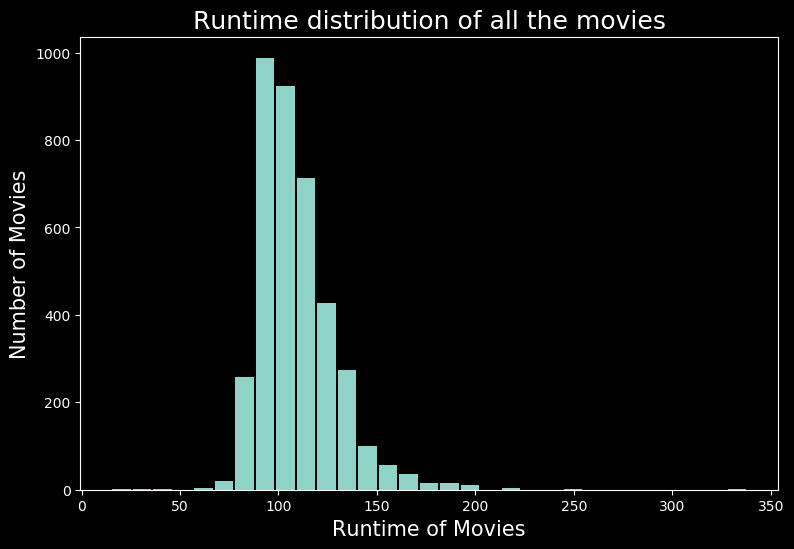

In [95]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')  #for dark  background
#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Variation in Runtime', fontsize=18)
#giving a histogram plot
plt.hist(movies['runtime'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()

The histogram above shows us about how many movies (on y-axis)lie between the interval of runtime (on x-axis). Through the graph, we can note that the maximum (i.e. the tallest bar) ranges from about 80-100 minutes. And evidently, around 1000 movies out of the total have this runtime.  This would probably mean that mode of the highest concentration of all the data pts. is in between the interval 80-100 minutes. Clearly,his is a positively skewed distribution.

#### Using BoxPlot for analyzing the distribution

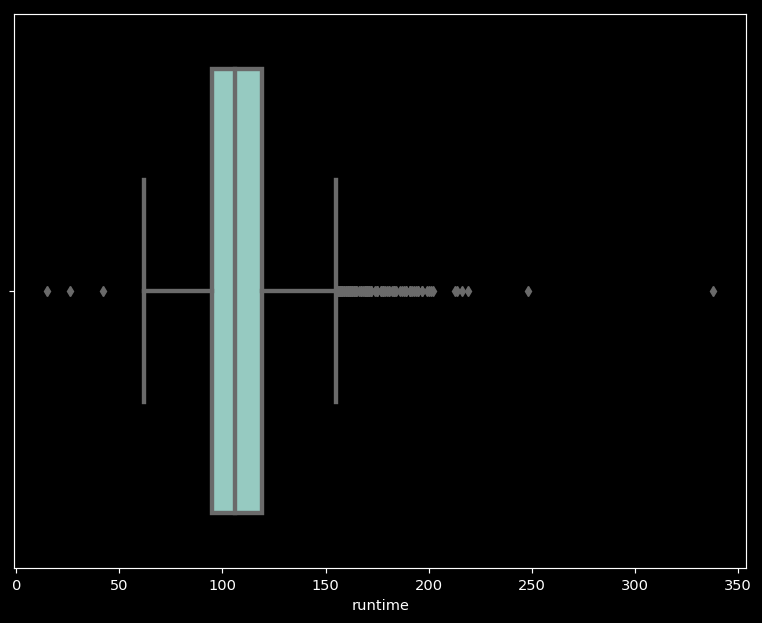

In [109]:
import seaborn as sns 

#giving two plots, thr first is the box plot, second is plots of runtime for movies
#giving figure size
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to plot
#plotting box plot
sns.boxplot(movies['runtime'], linewidth = 3)
#showing the plot
plt.show()

#### Plotting the data points

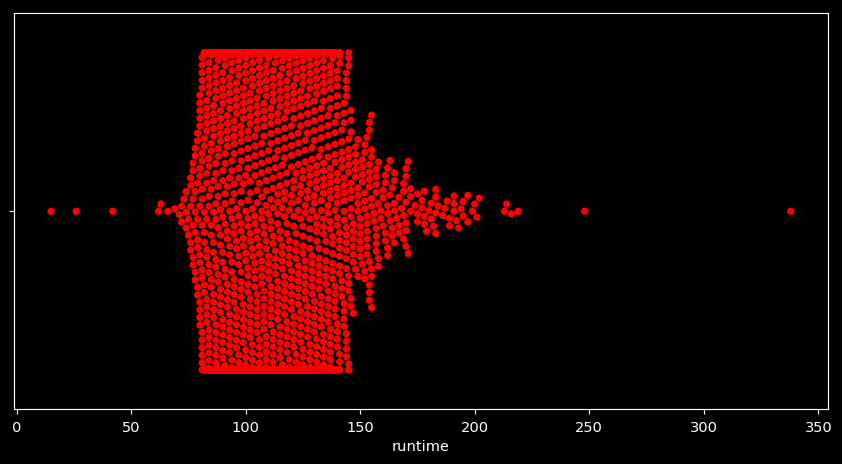

In [111]:
#plots the data points of runtime of movies

#giving figure size
plt.figure(figsize=(10,5), dpi = 105)

sns.swarmplot(movies['runtime'], color = 'red')
plt.show()

In [172]:
#Describing the numeric series
movies['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

The visualizations above represent the distribution of runtime of movies by plotting the data points, which lie in the distribution. And, importantly, how much percent of movies lie above/ below the runtime. A box-plot is helpful as it gives us brief idea about how the distribution is spread across. Through this visualisation, we got to know about outliers, min, max, and median.

Ofcourse, through this we get the exact, and precise values unlike the box plot. Describe function is helpful thus!

So by looking at both, visualiztions and calculations, we can say that..

25% of movies having a runtime of less than `95 min`
50% of movies having a runtime of less than `109 min`. This is also the median of runtimes.
75% of movies having a runtime of less than `119 min`
50% of movies have a runtime of between 95 min and `119 min`. This is also our IQR.
As we can see there are more movies after the 3rd quartile range than the 1st. This makes the mean of the runtime pull towards the right or increases it.

### F. Most profitable year for the movie buzz? 

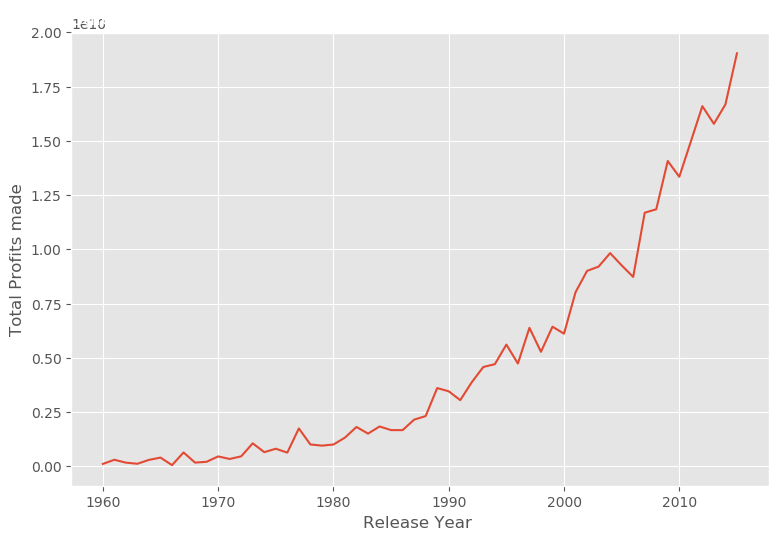

In [134]:
#Line plot used for this
#Since we want to know the profits of movies for every year we need to group all the movies for those years

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable

plt.style.use('ggplot') 
profits_by_year = movies.groupby('release_year')['Profit'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)

#labeling x-axis
plt.xlabel('Release Year ', fontsize = 12)
#labeling y-axis
plt.ylabel('Total Profits made', fontsize = 12)
#title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profits_by_year)

#showing the plot
plt.show()

By the graph, we can evidently see that the peak is at 2015, having the maximum profit of more than 18 million dollars. But, of course, we cannot simply assume that with the coming years, the profit will increase. Because, all the years in between the bin size (or rather interval in this case) have not been considered. So, perhaps, if that would have been considered, the graph may have looked slightly or more different than what it is at present. 

In [137]:
#This tells us the year which has the maximum profits
profits_by_year.idxmax()

2015

In [141]:
profits_by_year=pd.DataFrame(profits_by_year)

profits_by_year

,Profit
release_year,
1960,108198052
1961,299083188
1962,166879846
1963,115411882
1964,294678387
1965,399281854
1966,52468689
1967,636334637
1968,168271762


Thus, we have seen in the results that there's significant rise in the profits of movies from 2007, being the maximum at 2015.
Now, we'll be further analyzing the data. 

Before moving on with further analysis, data will be narrowed down to such that we'll be limited to certain aspects of data. Our primary goal is to find out how profit is affected by the different characterisitics simulatenously. Let us focus on the profit by only taking into consideration the movies with a profit of greater than 40 million. That should narrow down the dataset to something more specific. 

#### Considering movies with a profit greater than 40 million.

In [146]:
#Initializing a new data frame holding values of movies with a profit greater than 40 million $
profit_movies = movies[movies['Profit']>=40000000]

#Staring the dataframe from one
profit_movies.index=range(len(profit_movies))
#Index from 1 instead of 0
profit_movies.index+=1

#print dataset
profit_movies.head(2)

,budget,revenue,Profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [147]:
len(profit_movies)

1493

Now, this is the actual data upon which will be pondered our thoughts. The data comprises of all the movies with a profit of $40 million, or greater only. We have once again cleaned the data, decreasing from almost 4k entries to 1.5k only. Analyzing, and working on this set of data's much much easier than what we had begun with. 

### G. Average Runtime of Movies

In [154]:
#This is the function that'll calculate the average on the newly cleaned dataset profit_movies

def profit_average(column):
    return profit_movies[column].mean()

In [155]:
profit_average('runtime')

113.19624916275954

Avergae runtime: 113 minutes

### H. Average Budget of Movies

In [156]:
profit_average('budget')

57308877.08305425

Average Budget of Movies: $57M

### I.  Average Revenue of Movies

In [157]:
profit_average('revenue')

236306323.37374413

Average Revenue of Movies: $236M

### J. Director, Cast, and the number of movies

What's being done in the following cells is simple: We are trying to know about the directors, and cast, and the number of movies they have done in the criteria we have set above. 

In [160]:
#A common function'll be written to find the relationship of  the directors, and cast with the number of movies done. Note: this is being done on the 
#cleaned dataset. So, it'll include the more profitable movies only.

def data(column):
    #will take a column, and separate the string by '|'
    all_data = profit_movies[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count



In [162]:
x=data('director')

x.head()  #to show few results

Steven Spielberg    24
Clint Eastwood      15
Robert Zemeckis     13
Ridley Scott        12
Tim Burton          12
dtype: int64

Woah! There's a pretty big gap between the first two directors. So, maybe Steven Speilberg is something more correct than the others, in terms of fim-making and all. It may be in the storyline, or the fact that he must be a better director than the others. The greater number of films they put in the $40 million part, the better directors they seem to be. Obviously, making such big , and profitable films is not a piece of cake. 

In [164]:
x=data('cast')

x.head()  #to show few results

Tom Cruise        27
Tom Hanks         26
Brad Pitt         25
Cameron Diaz      22
Robert De Niro    21
dtype: int64

I was definitely expecting "Tom Cruise" at the top, and yes he is. Now, firstly all these actors are part of $40 million, and more worth movies. And doing 27 or so of them is a big deal. Now, would it affect having Tom Cruise or Hanks or Brad Pitt on the profit? Yes. From one perspective, their fans (which are huge in number!) may go watch the movie. From the other, maybe not. Because some people crave for the storylines, again, it may differ according to the criteria your are giving preference to.

### K. Which Genre is the most successful??

In [165]:
#Using the same function as that of for cast, and director.
genre = data('genres')

genre.head()

Drama        554
Comedy       542
Action       505
Thriller     454
Adventure    402
dtype: int64

In [ ]:
Let us see the visualisation of the genre vs the number of movies.

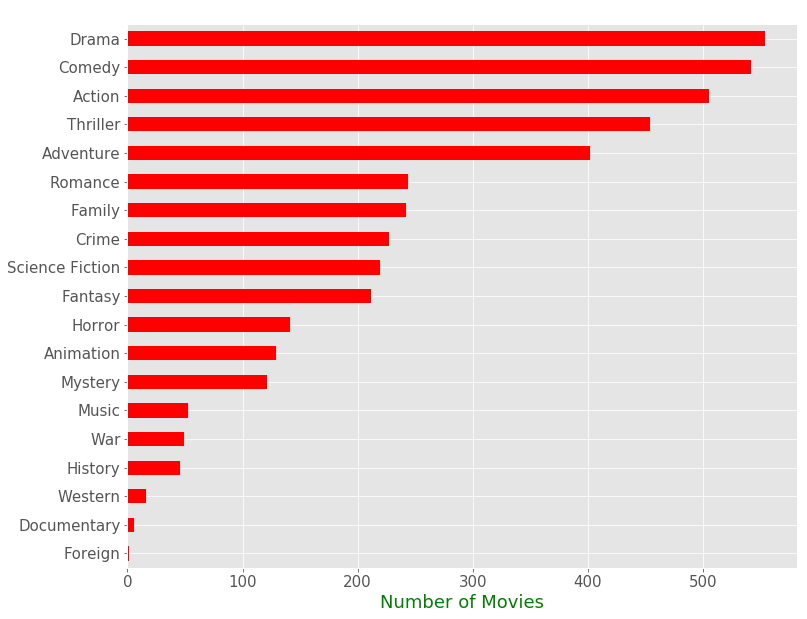

In [168]:
genre.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre.plot.barh(color = 'red', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

Drama, Comedy, and Action seemingly cover most of the graph! All the three genres in the category for movies having profit of greater than $ 40 million are crossing more than 500 movies. Does it mean if you've a film covering these three genres, then your movie is a sure-shot blockbuster? Bursting your bubble right here, a big no! It may increase the chances of the movie becomin very profitable, but as it is obvious, the genre is not the sole reason, determining how good a movie is in the market. 

### L. Year-by-Year Analysis 

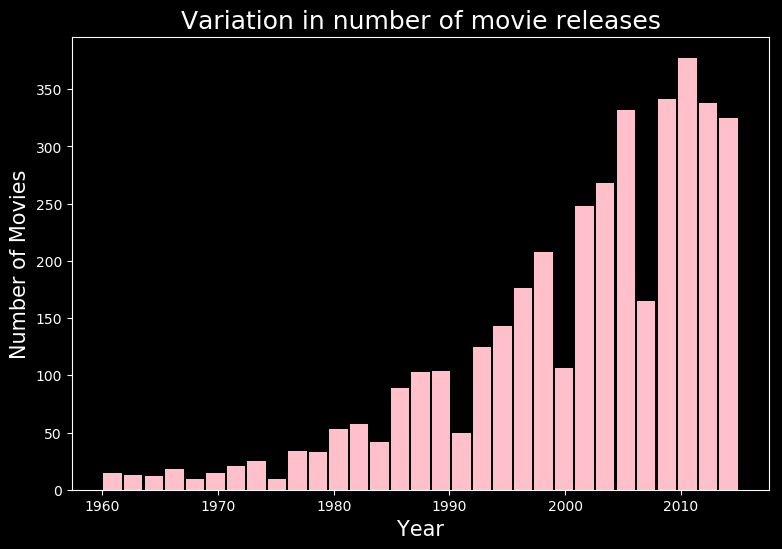

In [130]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')  #for dark  background
#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Year', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Variation in number of movie releases', fontsize=18)
#giving a histogram plot
plt.hist(movies['release_year'], rwidth = 0.9, bins =31,color='pink')
#displays the plot
plt.show()

From the graph, we can evidently say that the number of movieshave increased substantially by the mid of 21st century, it seems. And then, it has found the peak at around the year 2010( with more than 350 movies). 


### M. Month-by-Month Analysis

In [ ]:
This analysis means to find out which month released the highest number of movies, and which was the most profitable.

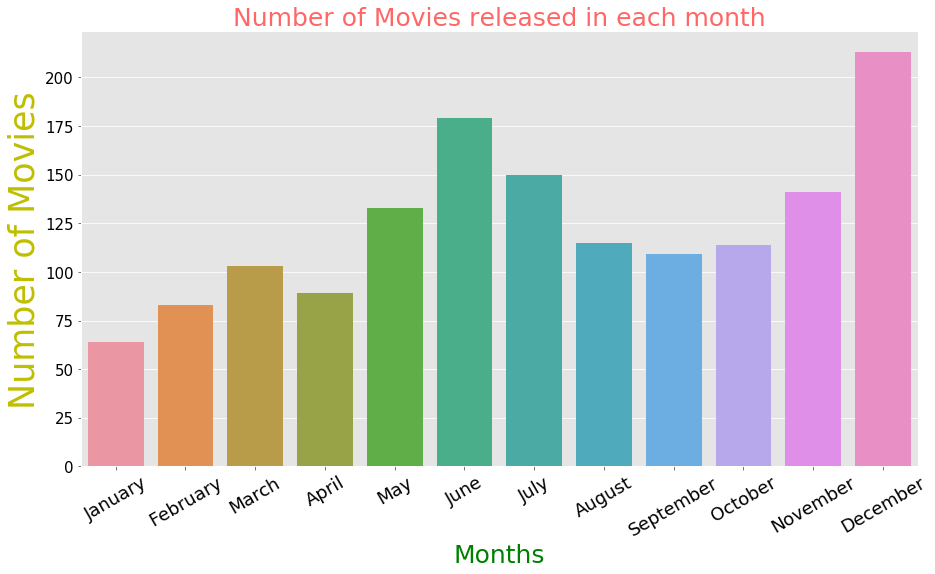

In [170]:
#for answering this question we need to group all of the months of years and then calculate the profits of those months
#giving a new dataframe which gives 'release-date' as index
index_rel_date = profit_movies.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_rel_date.groupby([(index_rel_date.index.month)])

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index['Profit'].count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#giving a list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count['Profit'], data = monthly_movie_count)

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_movie_count_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_movie_count_bar.set_ylabel("Number of Movies", color="y", fontsize = 35)

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

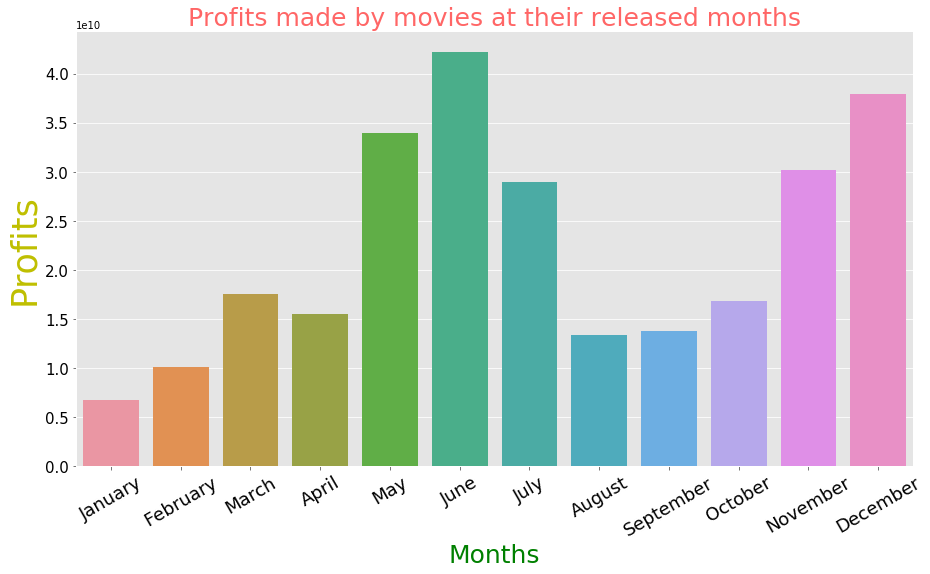

In [171]:
#finding the second part of this question

#now since the data is grouped by month, we add 'profit_(in_US_Dollars)' values to respective months, saving all this to a new var
monthly_profit = groupby_index['Profit'].sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit['Profit'], data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="y", fontsize = 35)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

Both the bar graphs above show a very similar trend, and yet they are somehow contradictory. Like say, for December, despite having more releases, it has less profits. While, it is the opposite scenario for June. In case of June, despite being less number of releases, it has concurred more profits than December. We cannot be absolutely sure for why this trend is as such, because there are many factors that have to be taken in account to. Here, we are only juggling between the profits, months, and the number of movies. The cast, story and genre remain undefined; hence, these visualizations just give us a vague idea about how these factors might be interlinked. And, hey that is exactly what data analysis is about. 

## CONCLUSIONS

After such thorogh research, I'd conclude that there's no one-right way to go about in making or releasing a film. But, trying to understand how your data item is affected by the surrounding variables can certainly making you come way closer to profits than before. 

Well, if I was in any part of the film-making process, I would choose:
Director: Steven Spielberg/Clint Eastwood 
Actor: Tom Cruise/Brad Pitt/Tom Hanks
Genre: Drama/Comedy/Action/Thriller
Releasing months: May-July/December
Hoping this would probably give me profits!

Limitation:
This is just a set from my perspective. It may or may not work for your perspective, as your opinion may contradict mine. The whole process in interlinked, and the factors are interwined. And, their presence/absence of factors affect the whole data in the end. I've done the study according to a certain criteria, considering some sample of the population (i.e for movies greater than $40 million profit), and also considering that the factors would be the same to make any movie profitable.! Hence, this research is confined to a perspective, and does not guarantee a profitable film. 

